# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stolumn

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_results = pd.merge(study_results,mouse_metadata,on="Mouse ID")
mouse_study_results['Tumor Volume (mm3)'] = mouse_study_results['Tumor Volume (mm3)'].apply(lambda x: round(x,1)) 

# Display the data table for preview
mouse_study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,b128,5,45.7,0,Capomulin,Female,9,22
2,b128,10,43.3,0,Capomulin,Female,9,22
3,b128,15,43.8,0,Capomulin,Female,9,22
4,b128,20,42.7,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.1,1,Capomulin,Male,22,17
1889,m601,30,31.8,1,Capomulin,Male,22,17
1890,m601,35,30.8,1,Capomulin,Male,22,17
1891,m601,40,31.4,1,Capomulin,Male,22,17


In [72]:
# Checking the number of mice.
mouse_study_results['Mouse ID'].nunique()

249

In [73]:
mouse_study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,b128,5,45.7,0,Capomulin,Female,9,22
2,b128,10,43.3,0,Capomulin,Female,9,22
3,b128,15,43.8,0,Capomulin,Female,9,22
4,b128,20,42.7,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.1,1,Capomulin,Male,22,17
1889,m601,30,31.8,1,Capomulin,Male,22,17
1890,m601,35,30.8,1,Capomulin,Male,22,17
1891,m601,40,31.4,1,Capomulin,Male,22,17


In [74]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study_results_dup = mouse_study_results[mouse_study_results.duplicated(['Mouse ID','Timepoint'],keep=False)]
mouse_study_results_dup['Mouse ID'].unique()


array(['g989'], dtype=object)

In [75]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_results[mouse_study_results['Mouse ID'] =='g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.0,0,Propriva,Female,21,26
861,g989,0,45.0,0,Propriva,Female,21,26
862,g989,5,48.8,0,Propriva,Female,21,26
863,g989,5,47.6,0,Propriva,Female,21,26
864,g989,10,51.7,0,Propriva,Female,21,26
865,g989,10,49.9,0,Propriva,Female,21,26
866,g989,15,51.3,1,Propriva,Female,21,26
867,g989,15,53.4,0,Propriva,Female,21,26
868,g989,20,55.3,1,Propriva,Female,21,26
869,g989,20,54.7,1,Propriva,Female,21,26


In [76]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_results = mouse_study_results.drop_duplicates(subset=['Mouse ID','Timepoint'], keep= 'first')
mouse_study_results = mouse_study_results.drop(mouse_study_results[mouse_study_results['Mouse ID']=='g989'].index)
mouse_study_results['Mouse ID'].nunique()

248

In [77]:
mouse_study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,b128,5,45.7,0,Capomulin,Female,9,22
2,b128,10,43.3,0,Capomulin,Female,9,22
3,b128,15,43.8,0,Capomulin,Female,9,22
4,b128,20,42.7,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.1,1,Capomulin,Male,22,17
1889,m601,30,31.8,1,Capomulin,Male,22,17
1890,m601,35,30.8,1,Capomulin,Male,22,17
1891,m601,40,31.4,1,Capomulin,Male,22,17


## Summary Statistics

In [78]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Drug_Regim_mean = mouse_study_results.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
Drug_Regim_median = mouse_study_results.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
Drug_Regim_var = mouse_study_results.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
Drug_Regim_std = mouse_study_results.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
Drug_Regim_SEM = mouse_study_results.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

Tumor = {'Mean Tumor Volume': Drug_Regim_mean,
         'Median Tumor Volume': Drug_Regim_median,
         'Tumor Volume Variance': Drug_Regim_var,
         'Tumor Volume Std. Dev.': Drug_Regim_std,
         'Tumor Volume Std. Err.':Drug_Regim_SEM}

Tumor_df = pd.DataFrame(Tumor)
Tumor_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.678261,41.55,24.954809,4.995479,0.329392
Ceftamin,52.589326,51.80,39.254292,6.265325,0.469606
Infubinol,52.885955,51.80,43.074321,6.563103,0.491925
Ketapril,55.237766,53.70,68.553379,8.279697,0.603859
Naftisol,54.330108,52.50,66.178440,8.135013,0.596488
Placebo,54.032044,52.30,61.148079,7.819724,0.581235
Propriva,52.320946,50.45,43.887926,6.624796,0.544555
Ramicane,40.217982,40.70,23.472054,4.844797,0.320854
Stelasyn,54.235359,52.40,59.453965,7.710640,0.573127


In [79]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mouse_study_results.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})

Tumor Volume (mm3)                                      
                           mean median        var       std       sem
Drug Regimen                                                         
Capomulin             40.678261  41.55  24.954809  4.995479  0.329392
Ceftamin              52.589326  51.80  39.254292  6.265325  0.469606
Infubinol             52.885955  51.80  43.074321  6.563103  0.491925
Ketapril              55.237766  53.70  68.553379  8.279697  0.603859
Naftisol              54.330108  52.50  66.178440  8.135013  0.596488
Placebo               54.032044  52.30  61.148079  7.819724  0.581235
Propriva              52.320946  50.45  43.887926  6.624796  0.544555
Ramicane              40.217982  40.70  23.472054  4.844797  0.320854
Stelasyn              54.235359  52.40  59.453965  7.710640  0.573127
Zoniferol             53.236813  51.80  48.524770  6.965972  0.516352

## Bar and Pie Charts

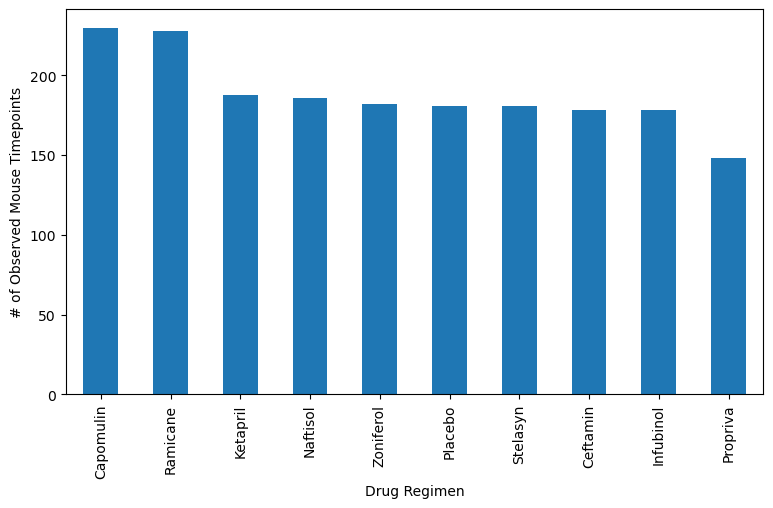

In [80]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

df = pd.DataFrame(mouse_study_results[['Drug Regimen','Timepoint']])
df = df.groupby('Drug Regimen')['Drug Regimen'].count()
df = df.sort_values(ascending=False)

df.plot(kind= 'bar',figsize= (9,5))
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

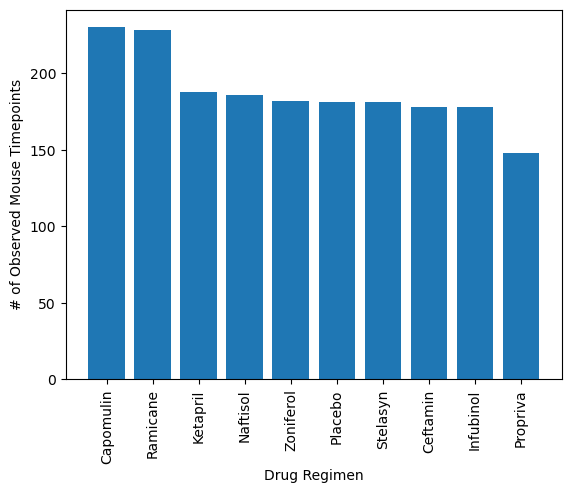

In [81]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
Name  = mouse_study_results['Drug Regimen'].unique()
Name  = sorted(Name)
x_axis = np.arange(0,len(Name))

df = mouse_study_results.groupby('Drug Regimen')['Mouse ID'].count()
dict = {'Name': Name,
        "Drug_count": df}

df = pd.DataFrame(dict)
df = df.sort_values('Drug_count',ascending=False)


plt.bar(df['Name'], df['Drug_count'], alpha = 1,align= "center")
plt.xticks(df['Name'], rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

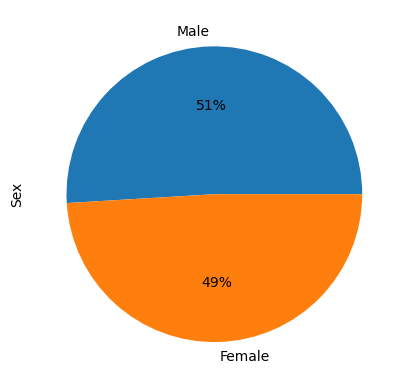

In [82]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Mouse_Study_Sex = mouse_study_results['Sex'].value_counts()

Mouse_Study_Sex.plot(kind='pie',autopct='%1.f%%')
plt.ylabel('Sex')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

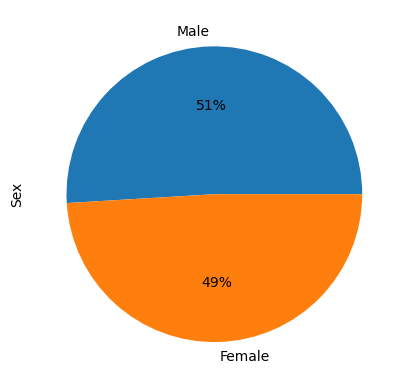

In [83]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_sex = mouse_study_results['Sex'].unique()
mouse_sex = reversed(sorted(mouse_sex))

sex_count = mouse_study_results['Sex'].value_counts()
dict1 = {'Sex': mouse_sex,
          'Sex_cnt': sex_count}

df1 = pd.DataFrame(dict1)

plt.pie(df1['Sex_cnt'],autopct='%1.f%%',labels= df1['Sex'])
plt.ylabel("Sex")
plt.show


## Quartiles, Outliers and Boxplots

In [84]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
df2 = mouse_study_results.groupby('Mouse ID')['Timepoint'].max()
df2 = pd.DataFrame(df2)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
data_merge = pd.merge(mouse_study_results,df2, on='Mouse ID',suffixes=['','_max'])
Top_four = data_merge.set_index('Drug Regimen').loc[['Capomulin','Ramicane','Infubinol','Ceftamin'],:].reset_index()
Top_four.head(5)

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g),Timepoint_max
0,Capomulin,b128,0,45.0,0,Female,9,22,45
1,Capomulin,b128,5,45.7,0,Female,9,22,45
2,Capomulin,b128,10,43.3,0,Female,9,22,45
3,Capomulin,b128,15,43.8,0,Female,9,22,45
4,Capomulin,b128,20,42.7,0,Female,9,22,45


In [85]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = Top_four['Drug Regimen'].unique()
treatments

array(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], dtype=object)

In [137]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

for x in range(len(Top_four)):
    if Top_four.loc[x,'Timepoint'] == Top_four.loc[x,'Timepoint_max']:
        tumor_vol.append([Top_four.loc[x,'Drug Regimen'], Top_four.loc[x,'Tumor Volume (mm3)']])
    
tumor_vol = pd.DataFrame(tumor_vol)
tumor_vol.rename(columns={0:'drug',1:'tumor_vol'}, inplace=True)
tumor_vol

,drug,tumor_vol
0,Capomulin,39.0
1,Capomulin,38.8
2,Capomulin,32.4
3,Capomulin,23.3
4,Capomulin,38.9
...,...,...
95,Ceftamin,61.4
96,Ceftamin,56.1
97,Ceftamin,59.7
98,Ceftamin,64.2


In [153]:
# Calculated the IQR for each 

Cap = tumor_vol[tumor_vol['drug'] == 'Capomulin']
Cap_plot =Cap.iloc[:,1]
Cap_Q1 = Cap.iloc[:,1].quantile(.25)
Cap_Q3 = Cap.iloc[:,1].quantile(.75)
Cap_IQR = Cap_Q3 - Cap_Q1
Cap_lower = Cap_Q1 -(1.5* Cap_IQR)
Cap_upper = Cap_Q3 + (1.5* Cap_IQR)

Ram = tumor_vol[tumor_vol['drug'] == 'Ramicane']
Ram_plot = Ram.iloc[:,1]
Ram_Q1 = Ram.iloc[:,1].quantile(.25)
Ram_Q3 = Ram.iloc[:,1].quantile(.75)
Ram_IQR = Ram_Q3 - Ram_Q1
Ram_lower = Ram_Q1 -(1.5* Ram_IQR)
Ram_upper = Ram_Q3 + (1.5* Ram_IQR)


Infu = tumor_vol[tumor_vol['drug'] == 'Infubinol']
Infu_plot = Infu.iloc[:,1]
Infu_Q1 = Infu.iloc[:,1].quantile(.25)
Infu_Q3 = Infu.iloc[:,1].quantile(.75)
Infu_IQR = Infu_Q3 - Infu_Q1
Infu_lower = Infu_Q1 -(1.5* Infu_IQR)
Infu_upper = Infu_Q3 + (1.5* Infu_IQR)

Ceft = tumor_vol[tumor_vol['drug'] == 'Ceftamin']
Ceft_plot = Ceft.iloc[:,1]
Ceft_Q1 = Ceft.iloc[:,1].quantile(.25)
Ceft_Q3 = Ceft.iloc[:,1].quantile(.75)
Ceft_IQR = Ceft_Q3 - Ceft_Q1
Ceft_lower = Ceft_Q1 -(1.5* Ceft_IQR)
Ceft_upper = Ceft_Q3 + (1.5* Ceft_IQR)

In [206]:
# Determine if there are any potential outliers. 

Outlier_dict = {}

for x in treatments:
    Q1 = tumor_vol.groupby('drug')['tumor_vol'].quantile(.25)
    Q3 = tumor_vol.groupby('drug')['tumor_vol'].quantile(.75)
    IQR = Q3 - Q1

    lower = Q1 -(1.5* IQR)
    upper = Q3 + (1.5* IQR)

    current_drug = tumor_vol.loc[tumor_vol['drug']== x,'tumor_vol']
    outlier = (current_drug < lower[x]) | (current_drug > upper[x])

#Outlier_dict[x] = tumor_vol.loc[outlier,'tumor_vol']
    index_at_true = np.where(outlier==True)[0]
   
    for x in index_at_true:
        Outlier_dict[x]=tumor_vol.iloc[outlier.index[x],:]

Outlier_dict

{0: drug         Infubinol
 tumor_vol         36.3
 Name: 50, dtype: object}

<function matplotlib.pyplot.show(close=None, block=None)>

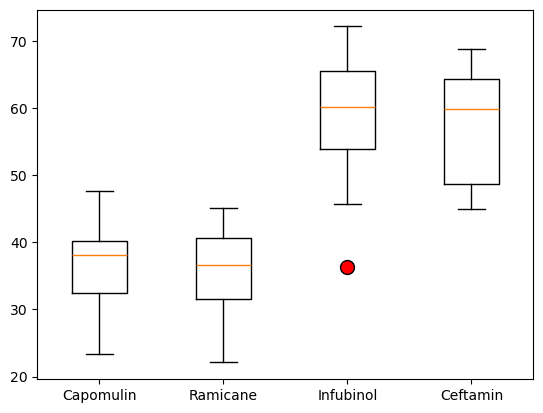

In [218]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot([Cap_plot,Ram_plot,Infu_plot,Ceft_plot],
            labels = ['Capomulin','Ramicane','Infubinol','Ceftamin'],
            flierprops={'marker':"o", 'markersize':10, 'markerfacecolor':'red'})
plt.show  

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse l509')

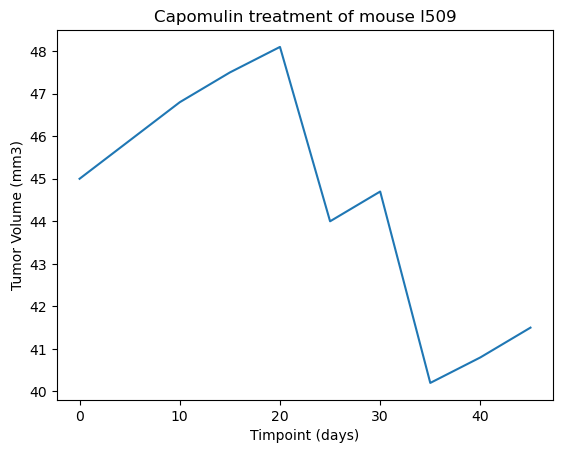

In [230]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
l509_tumor =Top_four[Top_four['Mouse ID'] == 'l509']['Tumor Volume (mm3)']
l509_time =Top_four[Top_four['Mouse ID'] == 'l509']['Timepoint']

plt.plot(l509_time,l509_tumor)
plt.xlabel('Timpoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')

<function matplotlib.pyplot.show(close=None, block=None)>

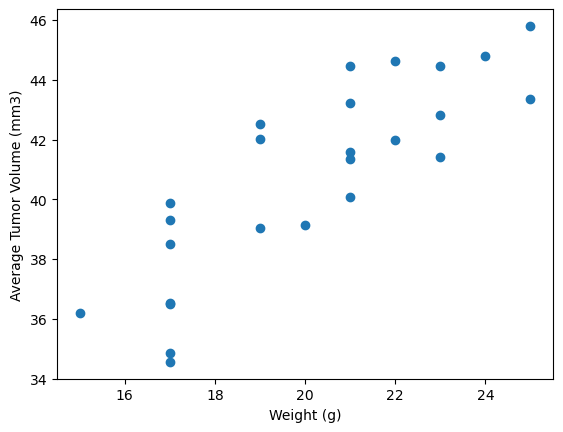

In [317]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Weight_v_tumor = mouse_study_results[mouse_study_results['Drug Regimen'] == 'Capomulin'].groupby(['Mouse ID','Weight (g)'])['Tumor Volume (mm3)'].mean()
pd.DataFrame(Weight_v_tumor)

Weight_v_tumor= Weight_v_tumor.reset_index()

Weight = Weight_v_tumor['Weight (g)']
Tumor = Weight_v_tumor['Tumor Volume (mm3)']

plt.scatter(Weight,Tumor)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show

## Correlation and Regression

<function matplotlib.pyplot.show(close=None, block=None)>

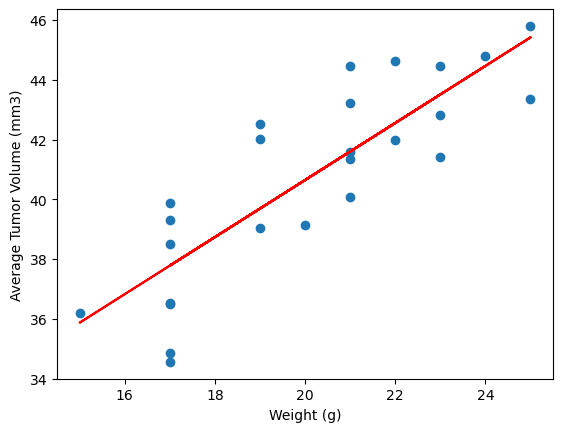

In [322]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

n = np.size(x)

Weight_mean = np.mean(Weight)
Tumor_mean = np.mean(y)

Sxy = np.sum(Weight*Tumor) - n*x_mean*Tumor_mean
Sxx = np.sum(Weight*Weight)-n * Weight_mean * Weight_mean

b1 = Sxy/Sxx
b0 = Tumor_mean-b1*Weight_mean

y_pred = b1* Weight +b0


Weight = Weight_v_tumor['Weight (g)']
Tumor = Weight_v_tumor['Tumor Volume (mm3)']

plt.scatter(Weight,Tumor)
plt.plot(x, y_pred, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show
